In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import qutip

In [32]:
terms = ['ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'ZIZI', 'IZZI', 'ZIIZ', 'IZIZ', 'IIZZ', 'XXYY', 'YXXY', 'XYYX', 'YYXX']
        
pauli_to_matrix = {'I': qutip.identity(2),
                   'X': qutip.sigmax(),
                   'Y': qutip.sigmay(),
                   'Z': qutip.sigmaz()}


def commutes(term1, term2):
    term1_matrices = [pauli_to_matrix[pauli] for pauli in term1]
    term2_matrices = [pauli_to_matrix[pauli] for pauli in term2]
    return qutip.commutator(qutip.tensor(*term1_matrices), qutip.tensor(*term2_matrices)).norm() == 0


def qwc_commutes(term1, term2):
    return all([commutes(term1[i], term2[i]) for i in range(len(term1))])

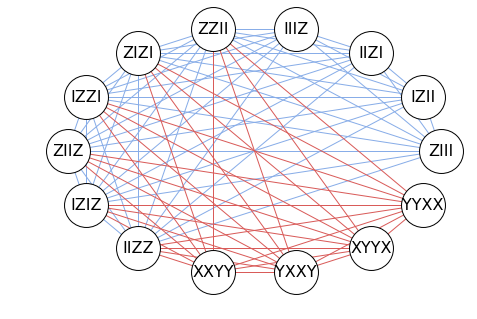

In [119]:
G = nx.Graph()
for term in terms:
    G.add_node(term)

colors = []
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if commutes(terms[i], terms[j]):
            if qwc_commutes(terms[i], terms[j]):
                G.add_edge(terms[i], terms[j], color='r')
                colors.append('#88ade8')
            else:
                G.add_edge(terms[i], terms[j], color='b')
                colors.append('#d95b59')
                
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_family="Times", font_size=16, node_color='#ffffff', node_size=1930, edge_color=colors)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
plt.savefig("H2_graph.svg")

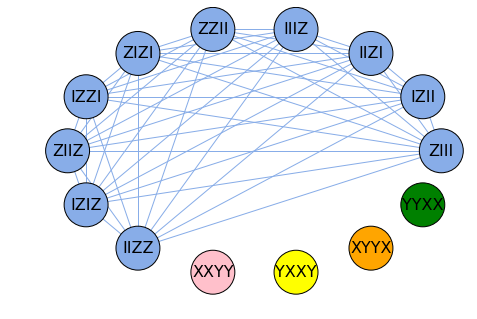

In [117]:
G = nx.Graph()
node_color = []
for term in terms:
    if term in ['XXYY', 'YXXY', 'XYYX', 'YYXX']:
        node_color.append(['pink', 'yellow', 'orange', 'green'][['XXYY', 'YXXY', 'XYYX', 'YYXX'].index(term)])
    else:
        node_color.append('#88ade8')
    G.add_node(term)

colors = []
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if commutes(terms[i], terms[j]):
            if qwc_commutes(terms[i], terms[j]):
                G.add_edge(terms[i], terms[j], color='r')
                colors.append('#88ade8')
                
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_family="Times", font_size=16, node_color=node_color, node_size=1930, edge_color=colors)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000")
plt.savefig("H2_QWC_Min_Clique_Cover.svg")

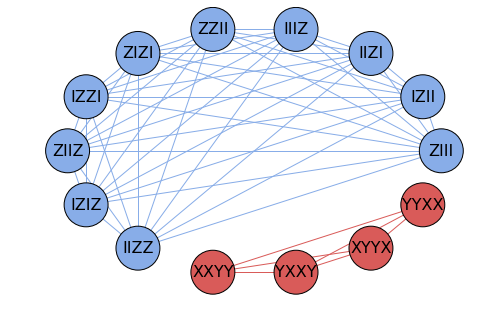

In [118]:
G = nx.Graph()
node_color = []
for term in terms:
    if term in ['XXYY', 'YXXY', 'XYYX', 'YYXX']:
        node_color.append('#d95b59')
    else:
        node_color.append('#88ade8')
    G.add_node(term)

colors = []
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if commutes(terms[i], terms[j]):
            if qwc_commutes(terms[i], terms[j]):
                G.add_edge(terms[i], terms[j], color='r')
                colors.append('#88ade8')
            else:
                if terms[i] in ['XXYY', 'YXXY', 'XYYX', 'YYXX'] and terms[j] in ['XXYY', 'YXXY', 'XYYX', 'YYXX']:
                    G.add_edge(terms[i], terms[j], color='b')
                    colors.append('#d95b59')

                
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_family="Times", font_size=16, node_color=node_color, node_size=1930, edge_color=colors)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000")
plt.savefig("H2_Full_Min_Clique_Cover.svg")